In [1]:
import numpy as np
from scipy.optimize import curve_fit
from drude_smith_fit import read_csv, drude_smith_c3, fit_function
from drude_smith_fit import plot_experimental_and_fitted_data

In [2]:
    filename = "mobility.csv"
    min_frequency = 0.3E12
    max_frequency = 2.2E12
    output_filename = "experimental_and_fitted_data.png"

In [3]:
frequencies, complex_numbers = read_csv(
    filename, min_frequency, max_frequency
)

Fitted value of m: 4.920404017399188e-05
Fitted value of tau: 3.391587752058548e-14
Fitted value of c1: -0.7536346966872032


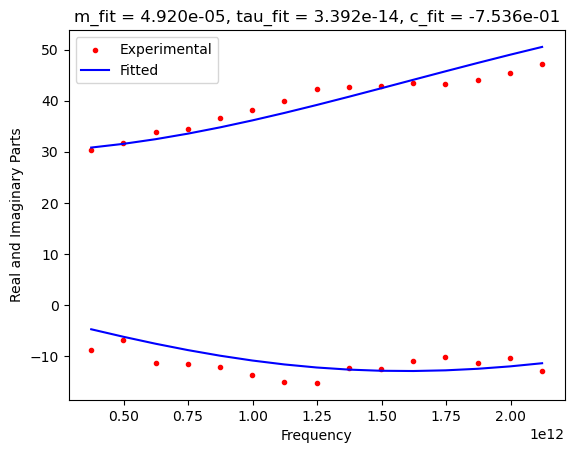

In [4]:
# To fit both the real and imaginary parts of the complex numbers
# create a 'stretched' array
stretched_complex_numbers = np.concatenate(
    (np.real(complex_numbers), np.imag(complex_numbers))
)

# Set some physics boundaries
min_m = 0.  # this helps the fit to converge
max_m = 10.  # this helps the fit to converge
min_c1 = -1.
max_c1 = 0.
min_tau = 0.
max_tau = np.inf

minima = [min_m, min_tau, min_c1]
maxima = [max_m, max_tau, max_c1]

# Perform the fit
params, pcov = curve_fit(
    fit_function, frequencies, stretched_complex_numbers,
    bounds=(minima, maxima)
)

# Extract the fitted parameters
m_fit, tau_fit, c1_fit = params
print("Fitted value of m:", m_fit)
print("Fitted value of tau:", tau_fit * 1E-15)  # Convert to femtoseconds
print("Fitted value of c1:", c1_fit)
# print("One standard deviation:", np.sqrt(np.diag(pcov)))

# Use the fitted parameters to calculate the fitted complex numbers
fitted_stretched_complex_numbers = fit_function(
    frequencies, m_fit, tau_fit, c1_fit
)

fitted_complex_numbers = \
    fitted_stretched_complex_numbers[:len(frequencies)] + \
    1j * fitted_stretched_complex_numbers[len(frequencies):]

plot_experimental_and_fitted_data(
    frequencies, complex_numbers, fitted_complex_numbers,
    "m_fit = %.3e, tau_fit = %.3e, c_fit = %.3e"
    % (m_fit, tau_fit * 1E-15, c1_fit),
    output_filename
)  # Convert to femtoseconds